In [ ]:
import server
import logging
import config
from matplotlib import pyplot as plt
import numpy as np

logging.basicConfig(
    format='[%(levelname)s][%(asctime)s]: %(message)s', level=getattr(logging, 'INFO'), datefmt='%H:%M:%S')

In [ ]:
exp_configs = [config.base_config_set('base_config.json', experiment = "MNIST_FMNIST", algorithm = 'fedcmoo'),
              config.base_config_set('base_config.json', experiment = "MNIST_FMNIST", algorithm= 'fsmgda'),
              config.base_config_set('base_config.json', experiment = "MNIST_FMNIST", algorithm= 'fedcmoo_pref')]

In [ ]:
number_of_rounds = 300 # For a quick demo, can be changed
for i in range(len(exp_configs)):
    exp_configs[i]['max_round'] = number_of_rounds

In [ ]:
test_mean_accuracy_list = list()
test_mean_loss_list = list()

In [ ]:
for i, exp_config in enumerate(exp_configs):
    s = server.Server(config.Config(exp_config))
    s.boot()
    s.train()
    mean_accuracy = 0
    for task in s.tasks:
        mean_accuracy += np.array(list(s.metrics.test_metrics[task]['accuracy'].values())) 
    mean_accuracy /= len(s.tasks)
    test_mean_accuracy_list.append(mean_accuracy)
    mean_loss = 0
    for task in s.tasks:
        mean_loss += np.array(list(s.metrics.test_metrics[task]['loss'].values())) 
    mean_loss /= len(s.tasks)
    test_mean_loss_list.append(mean_loss)

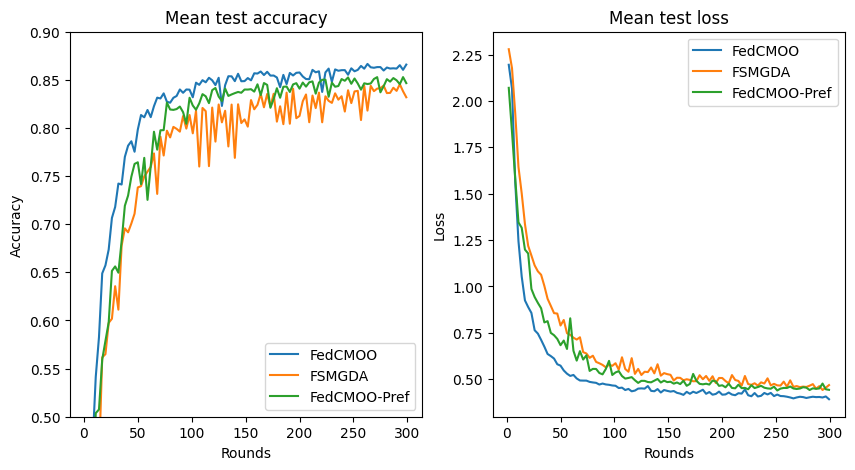

In [11]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
round_axis = np.array([int(ii) for ii in list(s.metrics.test_metrics[task]['accuracy'].keys())])
for i, algo in enumerate(['FedCMOO', 'FSMGDA', "FedCMOO-Pref"]):
    plt.plot(round_axis, test_mean_accuracy_list[i], label = algo)
plt.title('MNIST+FMNIST mean test accuracy')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.5, 0.9])
plt.subplot(1,2,2)
round_axis = np.array([int(ii) for ii in list(s.metrics.test_metrics[task]['loss'].keys())])
for i, algo in enumerate(['FedCMOO', 'FSMGDA', "FedCMOO-Pref"]):
    plt.plot(round_axis, test_mean_loss_list[i], label = algo)
plt.title('MNIST+FMNIST mean test loss')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.legend()